In [1]:
# First import the file

In [2]:
import pandas as pd
import numpy as np
marketing_data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
# Exercise 1 - show the dataframe shape

marketing_data.shape
marketing_data.head

<bound method NDFrame.head of        Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentSta

In [4]:
marketing_data = marketing_data.drop(['Unnamed: 0'], axis = 1)

In [5]:
# Exercise 2 - standardize header names

#First display the headers and check what needs to be done
display(marketing_data.columns)

#Put everything in lower cases
cols = []
for colname in marketing_data.columns:
    cols.append(colname.lower())
marketing_data.columns = cols

# check if it worked
display(marketing_data.columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [6]:
# Exercise 3 - which columns are numerical

marketing_data.select_dtypes('number').columns
numerical = marketing_data.select_dtypes('number').columns
numerical

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [7]:
# Exercise 4 - which columns are categorical

marketing_data.select_dtypes('object').columns
categorical = marketing_data.select_dtypes('object').columns
categorical

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [8]:
# Exercise 5 - check and deal with NaN values (no values) - decide what to do with them and comment

# use isna to show if there are na values - show in a sum
marketing_data.isna()
display(marketing_data.isna().sum())

# Check what percentage that is from the total values
round(marketing_data.isna().sum()/len(marketing_data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(marketing_data.isna().sum()/len(marketing_data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls'] #creates a table that looks nicer than the first code (round...)
nulls_df

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [9]:
### HOW DO I START?

# 1. Look at the categorical values
# 2. Consider the numerical values
# 3. Consider the value 'vehicle type' that is missing most of the values

In [10]:
## CONSIDER CATEGORICAL VALUES 

# 1. Check the count for state values, and response values - the same rows miss the same two values
    #However between state and response there no obvious relationship
display(marketing_data['state'].unique())
display(marketing_data['state'].value_counts(dropna=False))

display(marketing_data['response'].unique())
display(marketing_data['response'].value_counts(dropna=False))

# 2. Check the count for vehicle class, and vehicle size values - the same rows miss the same two values
    #Between vehicle class and vehicle size there is an obvious relationship

display(marketing_data['vehicle class'].unique())
display(marketing_data['vehicle class'].value_counts(dropna=False))

display(marketing_data['vehicle size'].unique())
display(marketing_data['vehicle size'].value_counts(dropna=False))

# 3. Show the vehicle type
display(marketing_data['vehicle type'].value_counts(dropna=False))

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
NaN            631
Name: state, dtype: int64

array(['No', 'Yes', nan], dtype=object)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
NaN               622
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

array(['Medsize', 'Small', 'Large', nan], dtype=object)

Medsize    7251
Small      1966
Large      1071
NaN         622
Name: vehicle size, dtype: int64

NaN    5482
A      5428
Name: vehicle type, dtype: int64

In [11]:
## CONSIDER CATEGORICAL VALUES 

# 4. FILL IN THE MISSING VALUE WITH THE MOST USED VALUE, where it makes sense - FOR RESPONSE, VEHICLE CLASS AND SIZE, TYPE

marketing_data['response'] = marketing_data['response'].fillna('No')

marketing_data['vehicle class'] = marketing_data['vehicle class'].fillna('Four-Door Car')
marketing_data['vehicle size'] = marketing_data['vehicle size'].fillna('Medsize')
marketing_data['vehicle type'] = marketing_data['vehicle type'].fillna('M')
marketing_data['state'] = marketing_data['state'].fillna('California')
# 5. Check if this is now true

display(marketing_data['response'].value_counts())

display(marketing_data['vehicle class'].value_counts())
display(marketing_data['vehicle size'].value_counts())
display(marketing_data['vehicle type'].value_counts())
display(marketing_data['state'].value_counts())


No     9444
Yes    1466
Name: response, dtype: int64

Four-Door Car    5834
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle class, dtype: int64

Medsize    7873
Small      1966
Large      1071
Name: vehicle size, dtype: int64

M    5482
A    5428
Name: vehicle type, dtype: int64

California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [12]:
# Check how many values are na in the whole dataset

display(marketing_data.isna().sum())

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employmentstatus                   0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          633
months since policy inception      0
number of open complaints        633
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                      0
vehicle size                       0
vehicle type                       0
dtype: int64

In [13]:
## NOW CONSIDER THE NUMERICAL VALUES 'months since last claim', 'number of open complaints'

# They seem to have an obvious relationship as well
#Get the mean for the 'months since last claim' and 'number of open complaints' and fill in the missing values

import numpy as np

# 1. Calculate the mean of the column 'months since last claim'
mean_months_since_last_claim = marketing_data['months since last claim'].mean()
print(mean_months_since_last_claim)

mean_number_of_open_complaints = marketing_data['number of open complaints'].mean()
print(mean_number_of_open_complaints)

# 2. Fill in the missing values
marketing_data['months since last claim'] = marketing_data['months since last claim'].fillna(mean_months_since_last_claim)
display(marketing_data.shape)

marketing_data['number of open complaints'] = marketing_data['number of open complaints'].fillna(mean_number_of_open_complaints)
display(marketing_data.shape)

# 3. Check for na values
# Check how many values are na in the whole dataset

display(marketing_data.isna().sum())

15.149070740488469
0.38425610586747105


(10910, 25)

(10910, 25)

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [14]:
## Control the dataframe for missing values

#5% of the original values are now deleted which is okay... maybe i could have created an unknown value for the states..

display(marketing_data.isna().sum())
display(marketing_data.shape)

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

(10910, 25)

In [15]:
# Exercise 6 - create a new column with just the month

# 1. Check out the data type
display(marketing_data.dtypes) #We see that effective to date is an object, we need to convert into a date
display(marketing_data.head(2))

marketing_data['effective to date'] = pd.to_datetime(marketing_data['effective to date'], errors='coerce')
# check if the values look like a date now
display(marketing_data.head(2))

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M


In [16]:
marketing_data['effective to date'].head(4)
marketing_data.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [17]:
# 2. Create a new column 'effective to month' that stores only the months
import datetime

marketing_data['effective to month'] = pd.DatetimeIndex(marketing_data['effective to date']).month

display(marketing_data.head(2))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,effective to month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1


In [18]:
# 3. Filter the data only for the first quarter, but first we need to convert the column into datatime

months = pd.date_range(start='01-JAN-2011', end='24-JAN-2011')

marketing_data['effective to month'][marketing_data['effective to month'].index.month >=(marketing['effective to month'].index.date[-1].month-3)

SyntaxError: unexpected EOF while parsing (2635388573.py, line 5)

In [19]:
# Exercise 7 - Put everything into a data transformation function, put everything i cleaned into a new function

#def clean_data(df):
    
    #standradize clums names
    #df.columns = [e.lower().replace(' ','_') for e in df.columns]
    
    #drop columns
   # df = df.drop(columns =['unnamed:_0'])
    
    #change dtype to date to datetime/ create new column 'month'
    #df['effective_to_date']=pd.to_datetime(df('effective to date'), errors = 'coerce')
    
    #return df

In [20]:
# Exporting this processed data to a csv

marketing_data.to_csv('marketing_customer_analysis_round2.csv')

ROUND 3

plot1 = yes and no diagram

Create a new column called response rate put answer yes = 1 and no = 0
- calculate the response rate, by creating a new column that gets a 1 when it is yes and a 0 when it is no

plot 2 = x = sales 
plot 3 = x = total claim amount (might need to do something to those)
plot 4 = x = income (might need to do something to those)

In [21]:
# Exercise 1 - show the dataframe info
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

display(marketing_data.head())
marketing_data.shape

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,effective to month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


(10910, 26)

In [22]:
# Exercise 2 - describe dataframe

# get a picture of the numerical variables
display(marketing_data.describe().T) #turn the table around to get a clear picture of the dataframe
display(marketing_data.describe(include=[np.object]).T)
display(marketing_data.info())

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.384256,0.885589,0.000000,0.000000,0.000000,0.384256,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
effective to month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


/var/folders/15/hgt62pt91txfslsjk64n8zd40000gp/T/ipykernel_12960/1185027489.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(marketing_data.describe(include=[np.object]).T)


,count,unique,top,freq
customer,10910,9134,ID89933,7
state,10910,5,California,4183
response,10910,2,No,9444
coverage,10910,3,Basic,6660
education,10910,5,Bachelor,3272
employmentstatus,10910,5,Employed,6789
gender,10910,2,F,5573
location code,10910,3,Suburban,6902
marital status,10910,3,Married,6319
policy type,10910,3,Personal Auto,8128


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

None

In [23]:
# get a picture of all the variables 
display(marketing_data.describe(include='all').T)

/var/folders/15/hgt62pt91txfslsjk64n8zd40000gp/T/ipykernel_12960/3023195842.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(marketing_data.describe(include='all').T)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,10910,9134,ID89933,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,10910,5,California,4183,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,10910.0,NaN,NaN,NaN,NaT,NaT,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
response,10910,2,No,9444,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,10910,3,Basic,6660,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10910,5,Bachelor,3272,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,10910,59,2011-01-10 00:00:00,239,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,10910,5,Employed,6789,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10910,2,F,5573,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,10910.0,NaN,NaN,NaN,NaT,NaT,37536.284785,30359.19567,0.0,0.0,33813.5,62250.75,99981.0


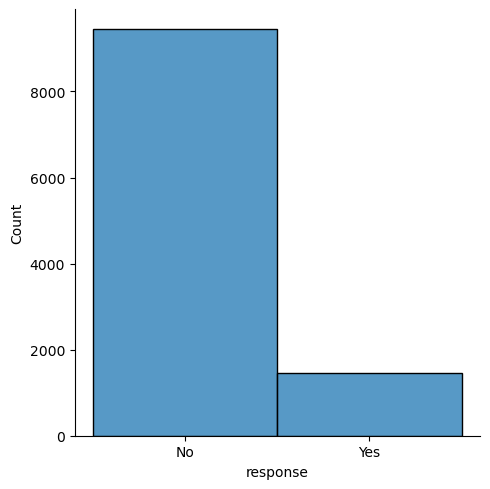

In [24]:
# Exercise 3 - show a plot of the total number of responses
sns.displot(marketing_data['response'], bins=2) #the distribution is 2 because it is either yes or no
plt.show()

In [25]:
# Exercise 4 - show a plot of the response rate by the sales channel

#Create a new column called response rate put answer yes = 1 and no = 0

def clean_response(x):
    if x == 'Yes':
        return 1
    else:
        return 0
    
# Now create a new column 'response rate'
marketing_data['response rate'] = list(map(clean_response, marketing_data['response']))
display(marketing_data['response rate'].unique())

# check dataframe
marketing_data['response rate'].value_counts()

array([0, 1])

0    9444
1    1466
Name: response rate, dtype: int64

In [26]:
# x = sales channel and y = response rate
marketing_data['sales channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

<AxesSubplot:xlabel='sales channel', ylabel='response rate'>

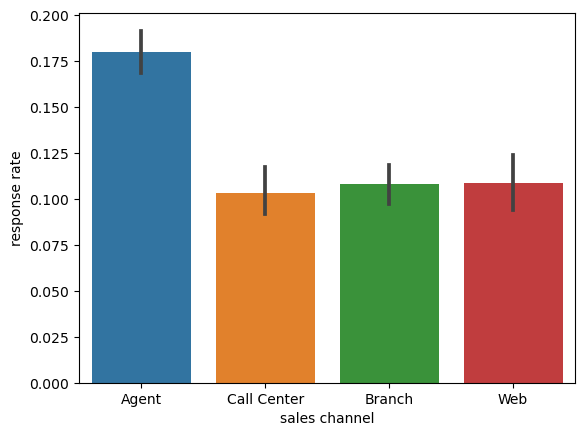

In [27]:
sns.barplot(x= "sales channel", y="response rate", data =marketing_data)

#here I see what percentage of the responses is a Yes

<AxesSubplot:xlabel='sales channel', ylabel='count'>

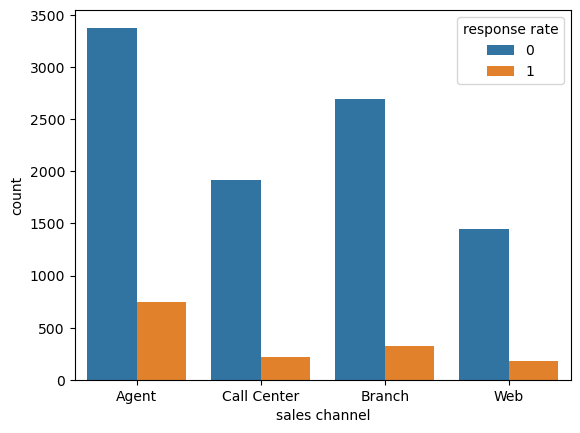

In [28]:
sns.countplot(data=marketing_data, x ="sales channel", hue="response rate")

# 0 = no and 1 = yes

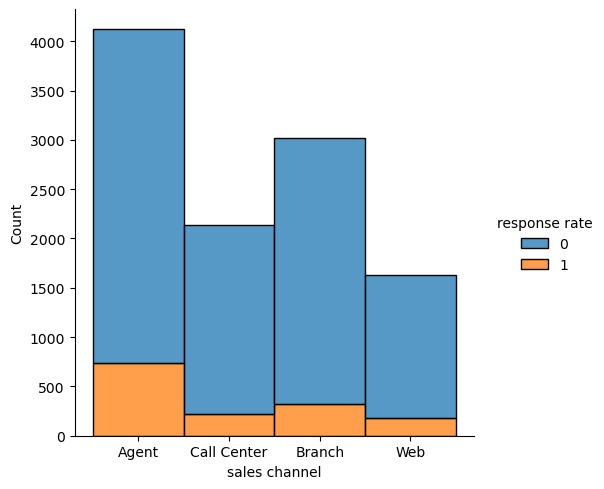

In [29]:
sns.displot(data=marketing_data, x ="sales channel", hue="response rate", multiple="stack")

In [30]:
# Exercise 5 - show a plot of the response rate by the total claim amount

display(marketing_data['total claim amount'].describe().T)

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total claim amount, dtype: float64

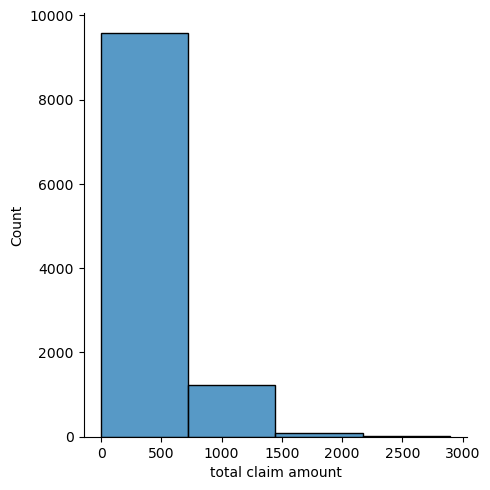

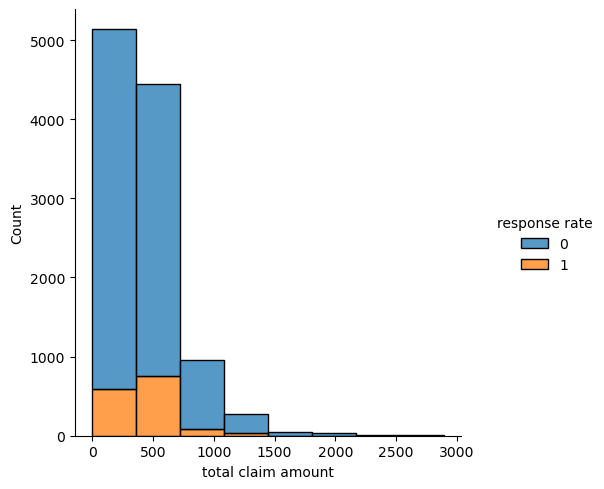

In [31]:
# It would make sense to look at the data in a boxplot and see the outliers depending on the quartiles

#We need to do something with the total claim amount
# I would group the total claims in the different quartiles
#sns.boxplot(data=marketing_data, x="total claim amount", y = "response rate", hue ="response rate")
# bin my claimns
sns.displot(data=marketing_data['total claim amount'], bins = 4)
sns.displot(data=marketing_data, x ="total claim amount", hue="response rate", multiple="stack", bins=8)

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: income, dtype: float64

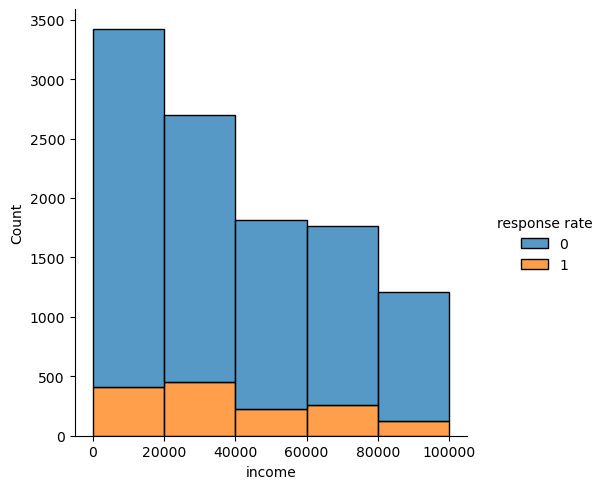

In [32]:
# Exercise 6 plot the response rate by income
display(marketing_data['income'].describe().T)
sns.displot(data=marketing_data, x ="income", hue="response rate", multiple="stack", bins=5)

In [33]:
# HOW TO BIN IN GROUPS
#data2['bins_incomes'] = pd.qcut(data2['income'], q=10, duplicates ='drop'

ROUND 4

1. 
2. seaborn to plot distribution plots - you can use a for loop for that
    for i in numerical:
        sns.distplot(marketing_data[['i']])
        plt.boxplot(marketing_data[['i']])
    Do histograms
    - Do they appear to be normally distributed? 
3. Check for multicolinerarity
    - Consider total_claim_amount
4. Drop one if necessary

ROUND 5

1. Create X, y, X_num and Y_num - y = total claim amount
2. Use option 1 normalize

In [ ]:
# All the needed libraries are imported

In [40]:
# Exercise 1 - Check the data for .dtypes and save numerical columns under numerical and categorical columns in categorical

display(marketing_data.dtypes)

numerical=marketing_data.select_dtypes(include= np.number)
print(numerical)

categorical=marketing_data.select_dtypes(include= np.object)
print(categorical)

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

       customer lifetime value  income  monthly premium auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       months since last claim  months since policy inception  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000      

/var/folders/15/hgt62pt91txfslsjk64n8zd40000gp/T/ipykernel_12960/2460762578.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=marketing_data.select_dtypes(include= np.object)


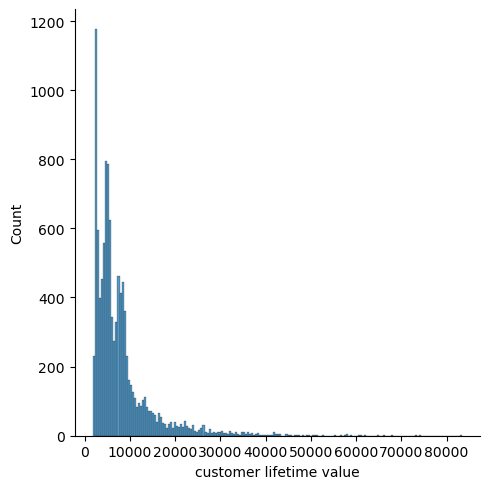

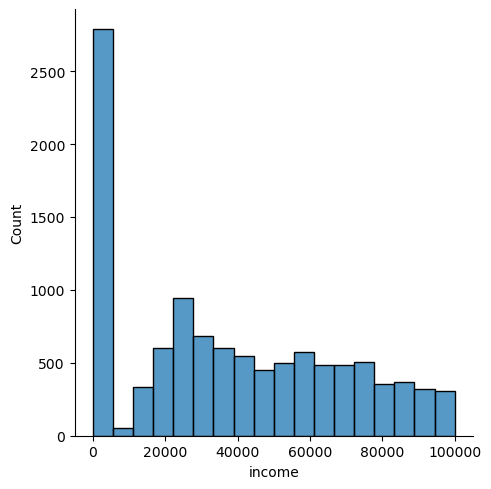

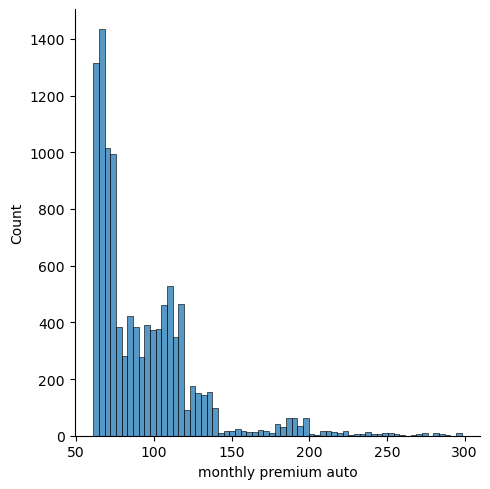

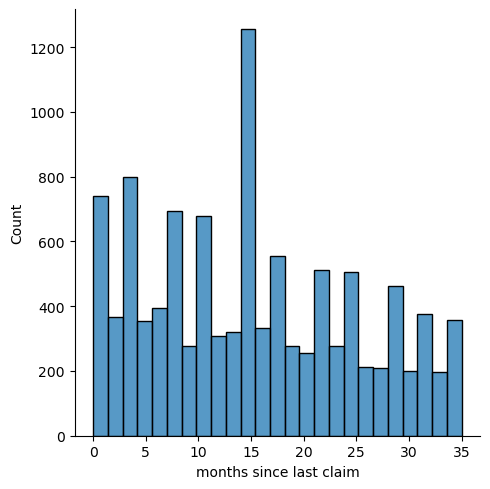

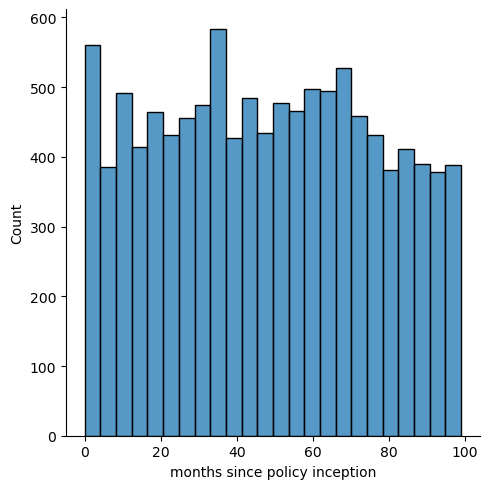

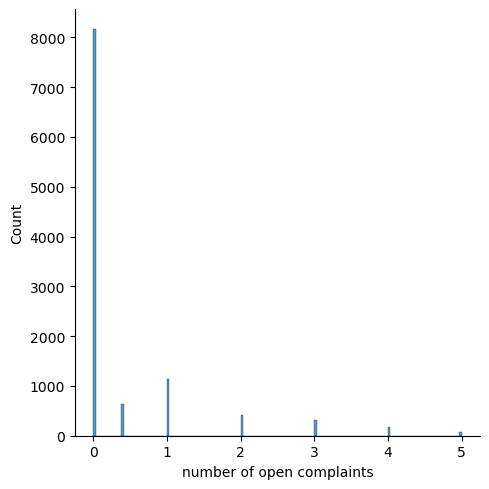

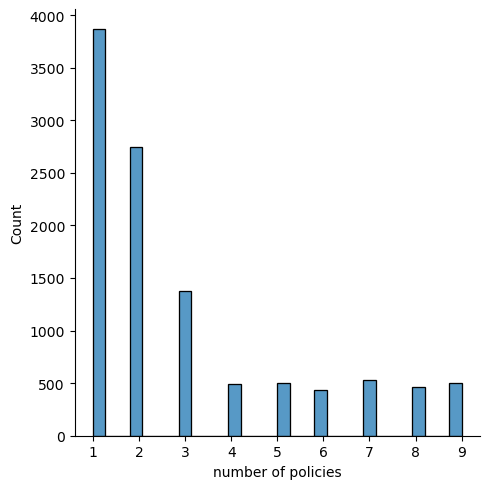

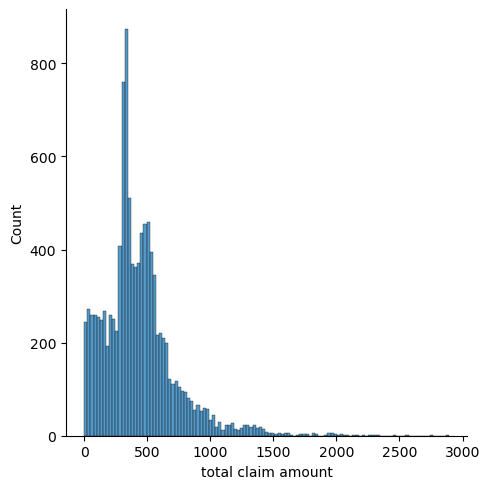

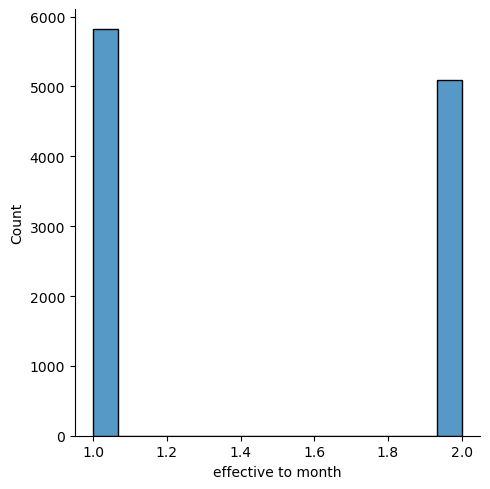

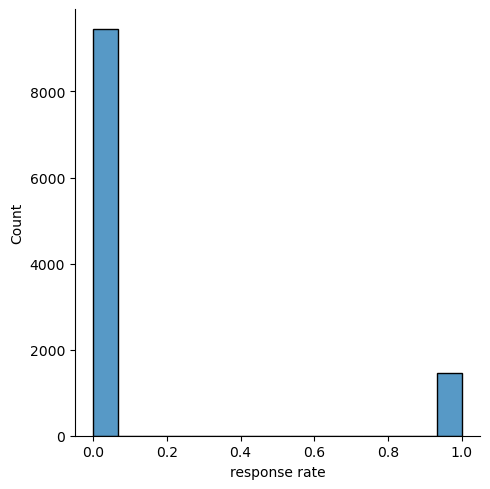

In [45]:
# Exercise 2 - Check the normality of numercial variables

## Exercise 2a - Use SNS to plot distribution plots

for i in numerical:
    sns.displot(marketing_data[i])
    plt.show()

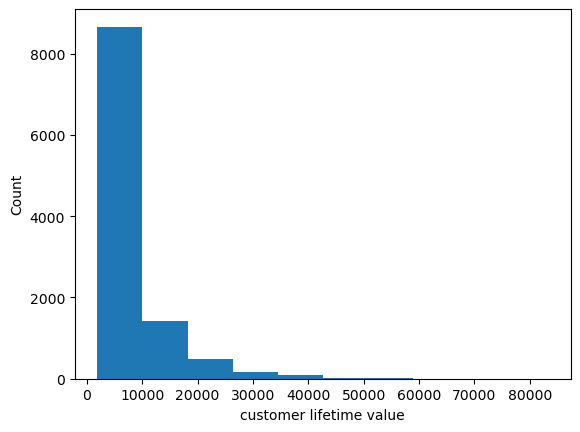

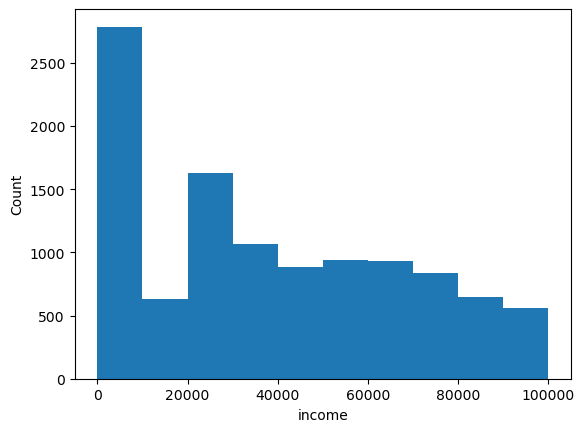

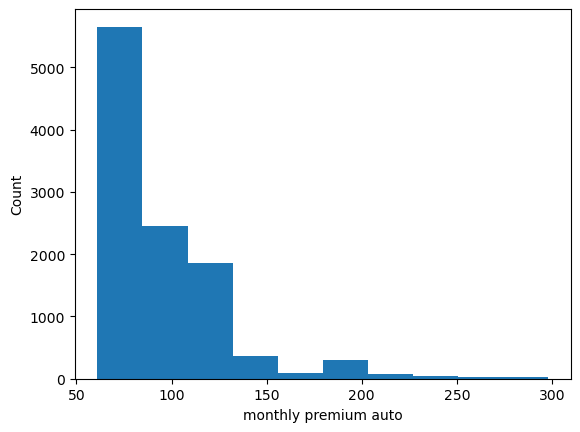

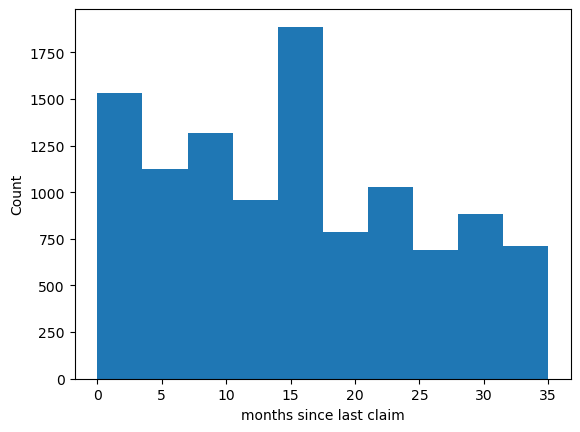

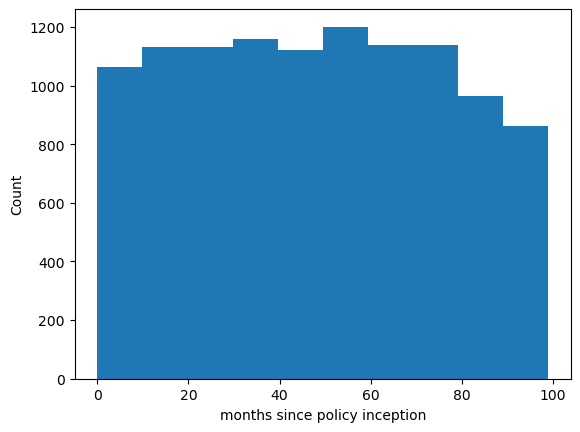

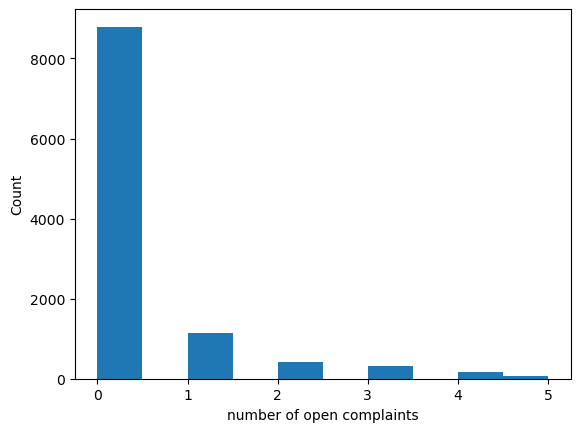

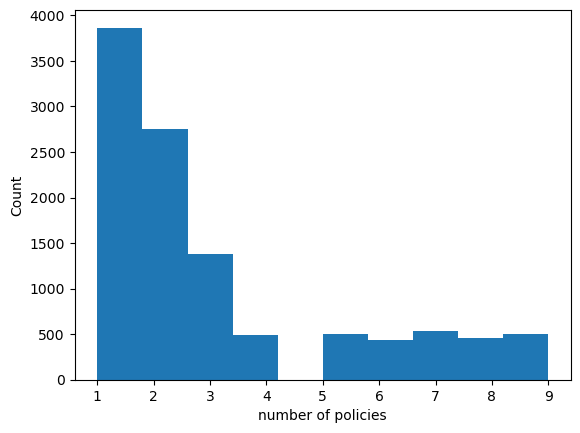

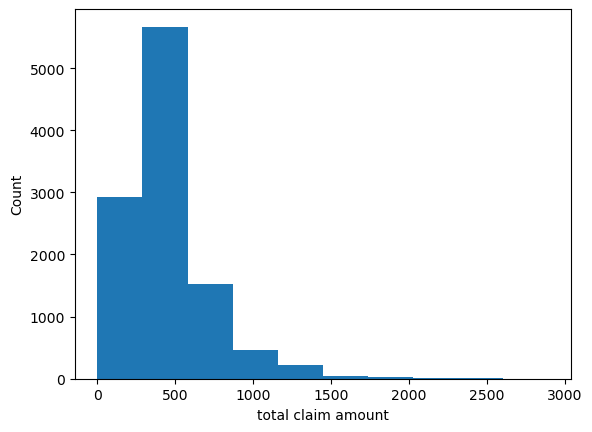

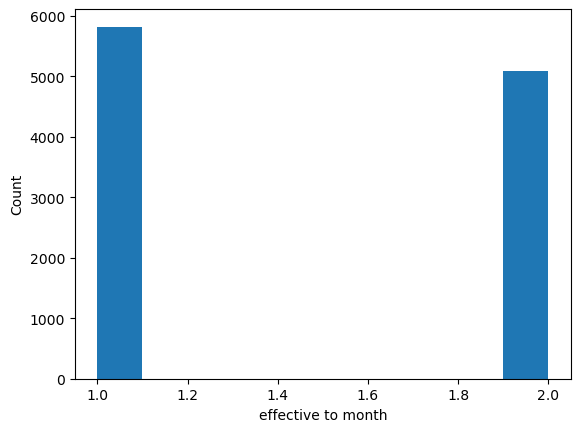

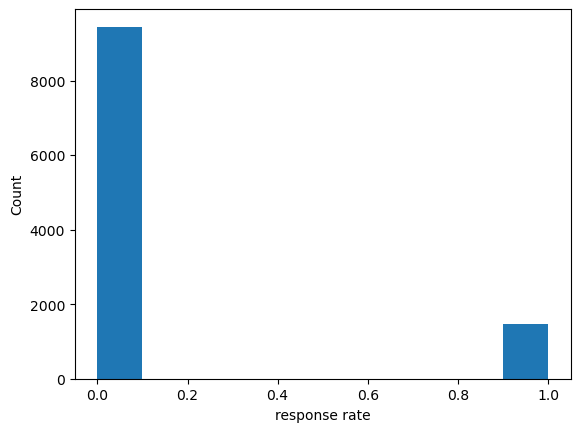

In [67]:
## Exercise 2b - Use PLT to plot histograms plots

for i in numerical:
    plt.hist(marketing_data[i])
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show()
    

##Exercise 2c - Do they appear to be normally distributed?

The following columns seem to be normally distributed:

    1. Months since last claim
    2. Number since policy inception
    3. Effective to month
    4. If we take out the outlier in income, we can consider this as normally distributed

In [68]:
# Exercise 3 - Check for multicollinerarity

# First let's do a correlation matrix
correlations_matrix = marketing_data.corr()
correlations_matrix = correlations_matrix.round(2)
display(correlations_matrix)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,effective to month,response rate
customer lifetime value,1.00,0.03,0.40,0.02,0.02,-0.03,0.02,0.23,-0.01,-0.01
income,0.03,1.00,-0.01,-0.02,-0.01,0.01,-0.01,-0.35,-0.00,0.01
monthly premium auto,0.40,-0.01,1.00,0.01,0.02,-0.01,-0.02,0.63,0.01,0.01
months since last claim,0.02,-0.02,0.01,1.00,-0.04,0.00,0.01,0.01,-0.02,-0.02
months since policy inception,0.02,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.00,0.02,-0.00
number of open complaints,-0.03,0.01,-0.01,0.00,0.00,1.00,0.00,-0.01,-0.00,-0.01
number of policies,0.02,-0.01,-0.02,0.01,-0.01,0.00,1.00,-0.01,0.01,-0.02
total claim amount,0.23,-0.35,0.63,0.01,0.00,-0.01,-0.01,1.00,0.00,0.02
effective to month,-0.01,-0.00,0.01,-0.02,0.02,-0.00,0.01,0.00,1.00,-0.03
response rate,-0.01,0.01,0.01,-0.02,-0.00,-0.01,-0.02,0.02,-0.03,1.00


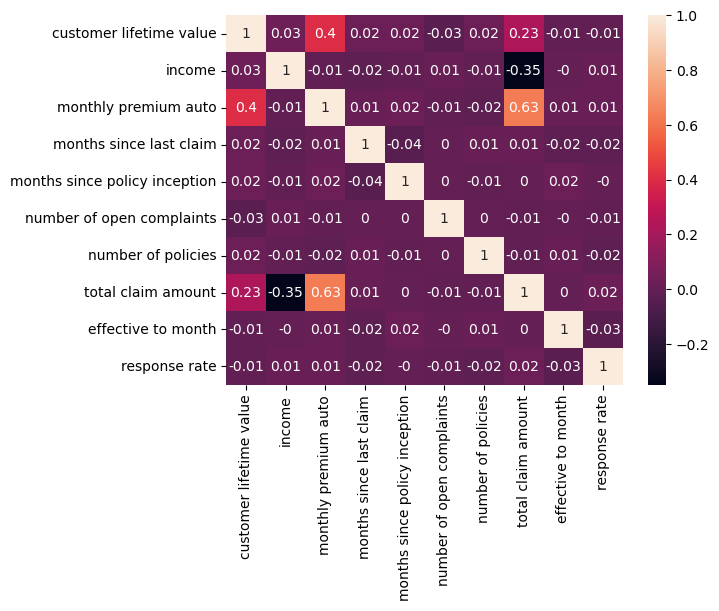

In [69]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#We notice that the features that have a higher correlation are monthly premium auto and total claim amount.

In [ ]:
# Exercise 4
# There are no features that need to be dropped

ROUND 5

In [60]:
# Exercise 1 - define X and y

# Split the data in y and X
y = marketing_data['total claim amount']
X = marketing_data.drop(['total claim amount'], axis = 1)

# Put the features in same groups, NUMMERICALS NEED TO BE SCALED, Categoricals don't
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [61]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,effective to month,response rate
0,4809.216960,48029,61,7.000000,52,0.000000,9,2,0
1,2228.525238,0,64,3.000000,26,0.000000,1,1,0
2,14947.917300,22139,100,34.000000,31,0.000000,2,2,0
3,22332.439460,49078,97,10.000000,3,0.000000,2,1,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1,0
10906,5259.444853,61146,65,7.000000,68,0.000000,6,1,0
10907,23893.304100,39837,201,11.000000,63,0.000000,2,2,0
10908,11971.977650,64195,158,0.000000,27,4.000000,6,2,0


In [62]:
X_cat

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [76]:
# Exercise 2 -Normalize the data
from sklearn.preprocessing import MinMaxScaler

# 1. Create a function 
transformer = MinMaxScaler().fit(X_num) #it will squize in the numbers between the min and max and uniformlly seperate it
# 2. Output are the scaled values
x_normalized = transformer.transform(X_num) #It is a dataframe but will be turned into an array
print(x_normalized.shape)

x_normalized
normalized_data = pd.DataFrame(x_normalized, columns=X_num.columns).corr() #correlation matrix for normlized features

(10910, 9)


<AxesSubplot:>

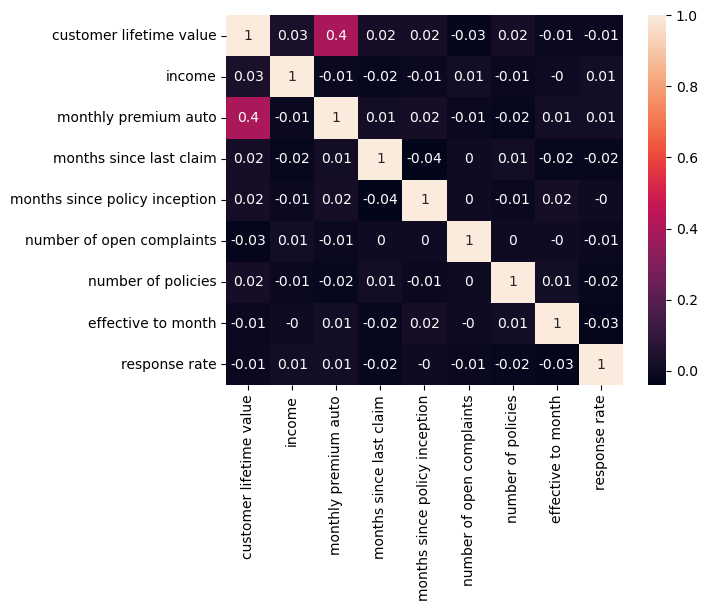

In [75]:
normalized_data = normalized_data.round(2)
sns.heatmap(normalized_data, annot = True)